STOCK PRICE ANALYSIS USING LINEAR REGRESSION AND OPTIMIZATION USING STANDARD SCALER

In [6]:
#first importing the libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [7]:
# Loading stock data ahead

np.random.seed(0)
dates = pd.date_range(start='2024-01-01', end='2024-12-31')
data = pd.DataFrame({
    'date': dates,
    'open': np.random.rand(len(dates)),
    'high': np.random.rand(len(dates)),
    'low': np.random.rand(len(dates)),
    'close': np.random.rand(len(dates)),
    'volume': np.random.rand(len(dates))
})
#printing the number of days the stock price need to be measured along with maximum price in a day, lowest price,opening price and volume of shares

print(len(dates))

366


In [162]:
data.head(10)

,date,open,high,low,close,volume
0,2024-01-01,0.198532,0.771263,-0.439650,0.309742,0.842879
1,2024-01-02,0.775400,-0.331961,-0.792109,0.099073,0.536643
2,2024-01-03,0.385590,1.381594,0.004480,-0.763834,-0.666308
3,2024-01-04,0.184904,0.655416,0.634014,1.366918,-1.080828
4,2024-01-05,-0.235426,0.687979,-0.736412,-0.864912,0.515251
5,2024-01-06,0.535135,-0.573902,0.100754,1.026636,1.091244
6,2024-01-07,-0.187119,0.881914,-1.278483,1.554703,-1.686227
7,2024-01-08,1.387661,0.472313,-1.134578,0.876083,0.418748
8,2024-01-09,1.636922,-0.871473,-1.517643,-0.013460,-0.252943
9,2024-01-10,-0.374856,-1.141157,1.613346,-1.537205,1.276408


In [8]:
data.shape # determining shape of the dataset

(366, 6)

In [9]:
# Pre processing the financial data

scaler = StandardScaler()
data[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'volume']])
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
# Distributing the data into training sets and testing sets

train['SMA_20'] = train['close'].rolling(window=20).mean()
train['Volatility'] = train['close'].rolling(window=20).std()
test['SMA_20'] = test['close'].rolling(window=20).mean()
test['Volatility'] = test['close'].rolling(window=20).std()

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

# Reassign X_train, X_test, y_train, y_test after dropping NaN values
features = ['open', 'high', 'low', 'volume', 'SMA_20', 'Volatility']
X_train, X_test = train[features], test[features]
y_train, y_test = train['close'], test['close']

In [10]:
# Fitting the model without null values

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# Implementing Linear Regression
features = ['open', 'high', 'low', 'volume', 'SMA_20', 'Volatility']
X_train, X_test = train[features], test[features]
y_train, y_test = train['close'], test['close']

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [ ]:
# Evalutaing the model

mae = mean_absolute_error(y_test, lr_pred)
print("Linear Regression MAE:", mae)

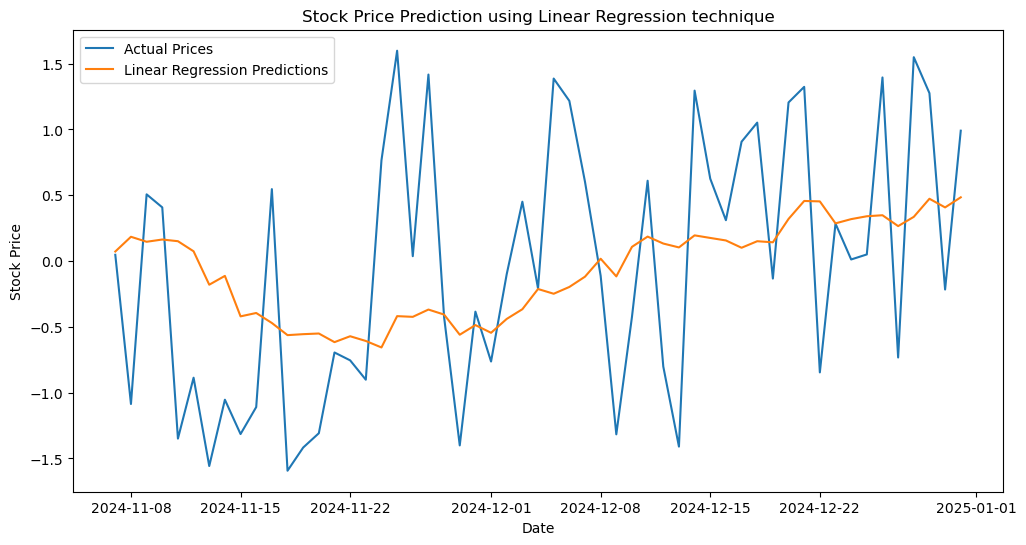

In [23]:
#Setting up the final plot by determining the stock pricing from test data trained through training set
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
plt.plot(test['date'][:len(lr_pred)], y_test[:len(lr_pred)], label='Actual Prices')
plt.plot(test['date'][:len(lr_pred)], lr_pred, label='Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using Linear Regression technique')
plt.legend()
plt.show()